<a href="https://colab.research.google.com/github/khadidja2005/OctoPink_models/blob/main/Breast_Cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch torchvision scikit-learn pandas matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
X.shape

(569, 30)

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [13]:
# Create a custom dataset class
import torch.utils.data as data


class BreastCancerDataset(data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

# Create PyTorch datasets and dataloaders
train_dataset = BreastCancerDataset(X_train, y_train)
test_dataset = BreastCancerDataset(X_test, y_test)

train_loader = data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


In [14]:
class BreastCancerModel(nn.Module):
    def __init__(self, input_size):
        super(BreastCancerModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
model = BreastCancerModel(input_size=X_train.shape[1])


In [15]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [16]:
# Train the model
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/50], Loss: 0.6491
Epoch [2/50], Loss: 0.5774
Epoch [3/50], Loss: 0.4968
Epoch [4/50], Loss: 0.4103
Epoch [5/50], Loss: 0.3302
Epoch [6/50], Loss: 0.2653
Epoch [7/50], Loss: 0.2163
Epoch [8/50], Loss: 0.1820
Epoch [9/50], Loss: 0.1567
Epoch [10/50], Loss: 0.1384
Epoch [11/50], Loss: 0.1237
Epoch [12/50], Loss: 0.1127
Epoch [13/50], Loss: 0.1036
Epoch [14/50], Loss: 0.0965
Epoch [15/50], Loss: 0.0903
Epoch [16/50], Loss: 0.0858
Epoch [17/50], Loss: 0.0817
Epoch [18/50], Loss: 0.0777
Epoch [19/50], Loss: 0.0744
Epoch [20/50], Loss: 0.0709
Epoch [21/50], Loss: 0.0680
Epoch [22/50], Loss: 0.0652
Epoch [23/50], Loss: 0.0633
Epoch [24/50], Loss: 0.0612
Epoch [25/50], Loss: 0.0590
Epoch [26/50], Loss: 0.0569
Epoch [27/50], Loss: 0.0552
Epoch [28/50], Loss: 0.0532
Epoch [29/50], Loss: 0.0519
Epoch [30/50], Loss: 0.0502
Epoch [31/50], Loss: 0.0488
Epoch [32/50], Loss: 0.0471
Epoch [33/50], Loss: 0.0458
Epoch [34/50], Loss: 0.0446
Epoch [35/50], Loss: 0.0433
Epoch [36/50], Loss: 0.0420
E

In [19]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Test the model
test_accuracy = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9825


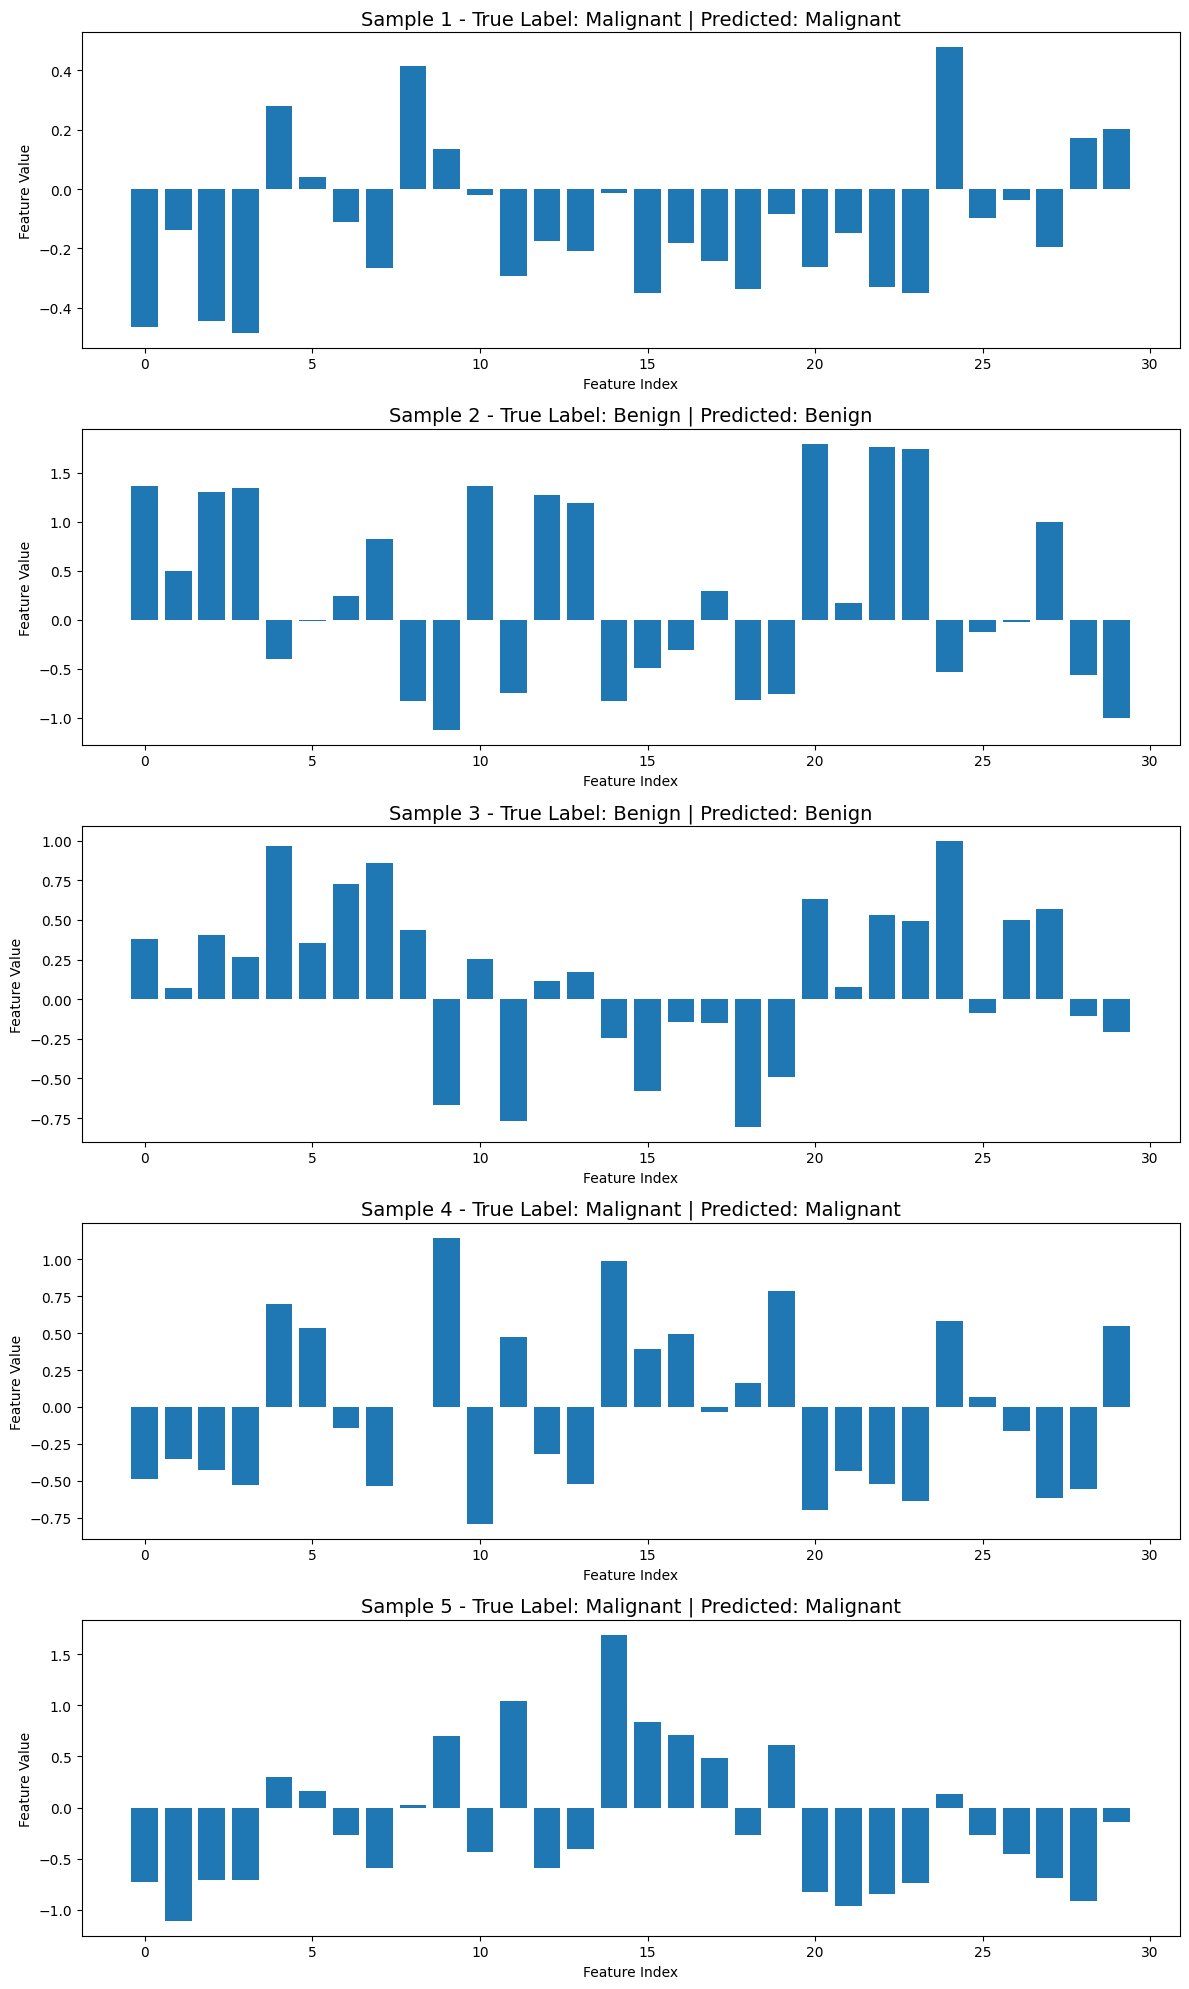

In [22]:
import matplotlib.pyplot as plt

def visualize_test_samples(model, test_loader, num_samples=5):
    model.eval()
    samples = []
    true_labels = []
    predicted_labels = []

    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()

        samples.extend(inputs[:num_samples].numpy())
        true_labels.extend(labels[:num_samples].numpy())
        predicted_labels.extend(predicted[:num_samples].numpy())

        if len(samples) >= num_samples:
            break

    # Plot the results for the collected samples
    fig, axes = plt.subplots(num_samples, 1, figsize=(12, num_samples * 4))

    for idx in range(num_samples):
        ax = axes[idx]
        # Plot the feature values as a bar chart
        ax.bar(range(len(samples[idx])), samples[idx])
        ax.set_title(f"Sample {idx+1} - True Label: {'Malignant' if true_labels[idx] == 1 else 'Benign'} | "
                     f"Predicted: {'Malignant' if predicted_labels[idx] == 1 else 'Benign'}", fontsize=14)
        ax.set_xlabel("Feature Index")
        ax.set_ylabel("Feature Value")

    plt.tight_layout()
    plt.show()

# Visualize some test samples with predictions
visualize_test_samples(model, test_loader, num_samples=5)
